<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>Projet Electronique S9: Synthétiseur</h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">PRE</span> <span class="badge badge-info">2022</span></p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
        <h1>Prototypage de signaux</h1>
    <h2>Synthèse soustractive</h2>
</div>

In [1]:
from numpy import *
from matplotlib.pyplot import *
import plotly.express as px
from IPython.display import Audio
from numpy.fft import *

### Paramètres de l'étude

In [2]:
Fe = 44100 #Ve en Hz pour le dommaine sonore
t = arange(0,2,1/Fe)# durée de 2s à la fréquence Ve

#Amplitude, écart type et fondamental des signaux
A = 5 #A=(1,10,1)
theta = 0 #theta=(1,20,1)
f0 = 200 #f0=(0,20000,500)
fmax = f0

### Graphique, Audio

In [25]:
def graph(x,fig_number):
    figure(fig_number)
    fig0 = plot(t,x,label="coucou")
    fig0 = px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.01])
    fig0.show
def audio(sig):
    audio = Audio(sig, rate = Fe)
    return audio

### Calcul de Transformée de Fourrier Discrète

In [4]:
def fftcalc(echantillons):
    tfd = fft(echantillons)
    N = len(echantillons)
    spectre = np.absolute(tfd)**(2)/N #spectre en amplitude
    freq = np.fft.fftfreq(len(spectre),1/Fe)
    
    fig2 = figure(figsize=(10,4))
    xlim([-2000,2000])
    plot(freq,spectre,'r')
    #xlabel('f')#ylabel('A')axis([-0.1,fe,0,spectre.max()])
    grid()
    fig2.show

### Filtre paramétrique

In [14]:
def paramFilter(x,fc,Q, bfl): # x signal en entrée échantillonné, fc en Hz,Q=1/2*m, avec m [0;1]
    #init filter
    f1 = 2*np.sin((np.pi*fc)/Fe)
    f2 = 1/Q 
    
    yh = np.arange(0,2,1/Fe)
    yb = np.arange(0,2,1/Fe)
    yl = np.arange(0,2,1/Fe)
    
    N = len(x)
    yh[0] = x[0] #init high pass
    yb[0] = f1*yh[0] #init band pass
    yl[0] = f1*yb[0] #init low pass
    
    for i in range(1, N):
        yh[i] = x[i] - yl[i-1] - f2*yb[i-1]
        yb[i] = f1*yh[i] + yb[i-1]
        yl[i] = f1*yb[i] + yl[i-1]
        i = i+1
    #print("Filtre paramétrique: ", "yh=", yh, " yb=", yb, " yl=", yl)
    if bfl == "h":
        return yh
    elif bfl == "b":
        return yb
    elif bfl == "l":
        return yl

## Signaux étudiés

### Signal sinusoidal

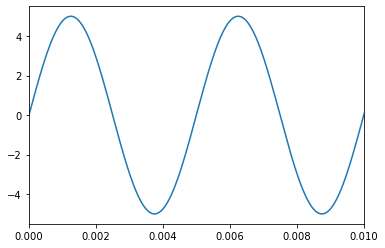

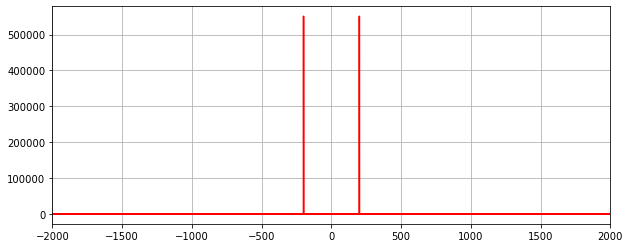

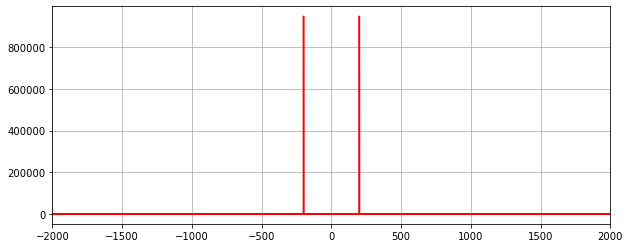

In [28]:
def sinw():
    #pour voir le signal en temporel
    x1 = A*sin(2*pi*f0*t-theta)
    return x1
    
signal_sin = sinw()
signal_sin_plot = graph(signal_sin, 0)
fftcalc(signal_sin)
filtered_sin = paramFilter(signal_sin,400,4,"l")
fftcalc(filtered_sin)
audio(signal_sin)

### Signal dent de scie

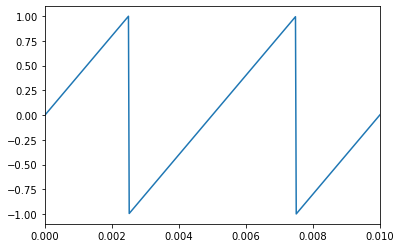

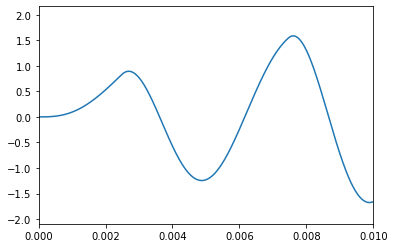

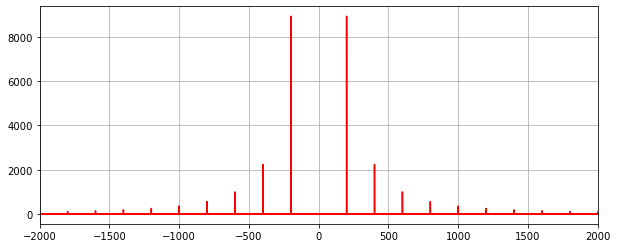

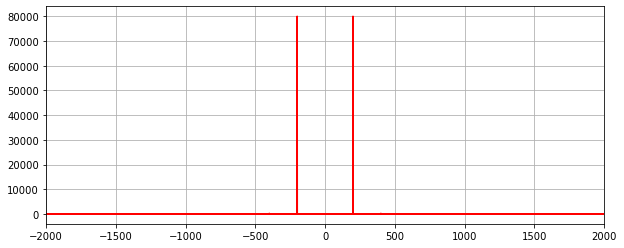

In [33]:
 def sawtooth():
        floor_step = floor((1/2) + (t*f0))
        saw = 2 * ((t*f0) - floor_step)
        return saw

signal_sawtooth = sawtooth()
filtered_sawtooth = paramFilter(signal_sawtooth,200,3,"l")

signal_saw_plot = graph(signal_sawtooth,0)
signal_saw_filtered_plot = graph(filtered_sawtooth,1)

fftcalc(signal_sawtooth)
fftcalc(filtered_sawtooth)

audio(signal_sawtooth)

In [34]:
audio(filtered_sawtooth)

### Signal carré

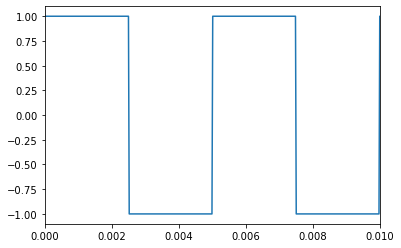

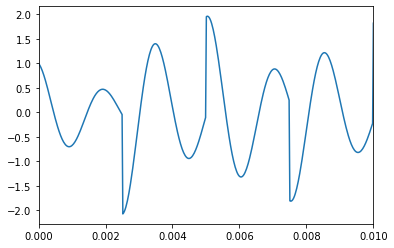

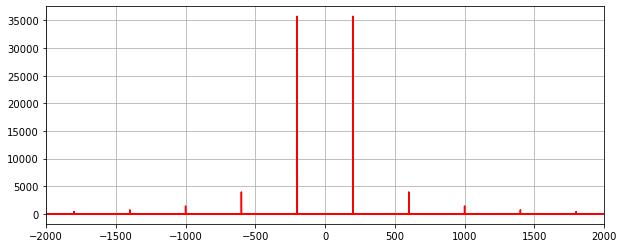

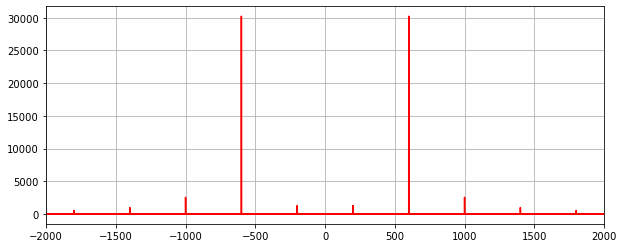

In [36]:
def square():
    square = 4*floor(t*f0) - 2*floor(2*t*f0) + 1
    return square

signal_square = square()
filtered_square = paramFilter(signal_square,500,4, "h")

signal_square_plot = graph(signal_square,0)
signal_square_filtered_plot = graph(filtered_square,1)

fftcalc(signal_square)
fftcalc(filtered_square)

audio(signal_square)

In [37]:
audio(filtered_square)